<a href="https://colab.research.google.com/github/bassemr/DeepLearningAndGenerativeModelsCourse/blob/main/ex9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing CNN kernels and activations

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [3]:
# Let's start by defining the model to finetune
# For this example we will use Alexnet
import torchvision.models as models

alexnet = models.alexnet(weights='IMAGENET1K_V1').to(device)
print(alexnet)

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


100%|██████████| 233M/233M [00:01<00:00, 146MB/s]


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [9]:
k = alexnet.features[0].weight.detach().clone().cpu()
k.view(64*3, -1, 11,11).shape

torch.Size([192, 1, 11, 11])

torch.Size([64, 3, 11, 11])
After: torch.Size([64, 3, 11, 11])
torch.Size([3, 11, 11])
tensor([[[ 1.1864e-01,  9.4069e-02,  9.5435e-02,  1.0515e-01,  1.0291e-01,
           6.7224e-02,  5.0466e-02,  5.0125e-02,  5.5822e-02,  2.1575e-02,
           4.9963e-02],
         [ 7.4882e-02,  3.8940e-02,  5.2979e-02,  7.5955e-02,  7.2286e-02,
           7.2904e-02,  5.2016e-02,  2.7115e-02,  2.5709e-02, -1.1299e-02,
           4.1590e-03],
         [ 7.5425e-02,  3.8779e-02,  5.4930e-02,  5.5807e-02,  5.2543e-02,
           5.0020e-02,  4.7630e-02,  2.5285e-02,  4.3596e-02,  1.0225e-02,
           1.3251e-02],
         [ 7.0420e-02,  5.2510e-02,  6.3095e-02,  6.2153e-02,  5.8876e-02,
           3.8574e-02,  4.5036e-02,  3.8129e-02,  4.5773e-02,  1.9212e-03,
           2.9633e-03],
         [ 8.7315e-02,  7.4974e-02,  7.1627e-02,  8.3448e-02,  9.4555e-02,
           6.5405e-02,  3.3532e-02,  2.1039e-02,  2.2060e-02, -1.0646e-02,
          -3.4279e-02],
         [ 9.5834e-02,  9.9245e-02,  1.0057

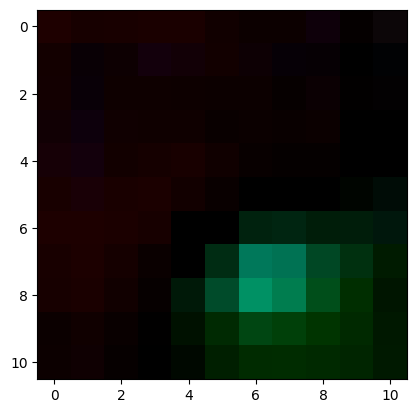

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F

layers_list = [0,3,6,8,10] #kernels that we want to visualize

for k in layers_list:
    # get the kernels from the first layer
    # as per the name of the layer
    kernels = alexnet.features[k].weight.detach().clone().cpu()

    #check size for sanity check
    print(kernels.size())

    n,c,w,h = kernels.shape
    row_num = 8

    print(f"After: {kernels.shape}")

    rows = np.min((kernels.shape[0] // row_num + 1, 16))
    print(kernels[0].shape)
    print(kernels[0])
    plt.imshow(kernels[0].permute(1, 2, 0))

    kernels = kernels.view(n*c, -1, w, h)

    break
    if kernels.shape[0] > 128:
        kernels = kernels[:128]
    # normalize to (0,1) range so that matplotlib
    # can plot them
    kernels = kernels - kernels.min()
    kernels = kernels / kernels.max()

    #filter_img = torchvision.utils.make_grid(kernels, nrow = rows)

    plt.figure(figsize=(15, 5))
    for i in range(kernels.shape[0]):
        plt.subplot(row_num, rows, i + 1)
        # change ordering since matplotlib requires images to
        # be (H, W, C)
        plt.imshow(kernels[i].permute(1, 2, 0))
        plt.axis('off')



# Visualize CNN activations

In [33]:
!git clone https://github.com/bassemr/DeepLearningAndGenerativeModelsCourse.git

import sys
sys.path.append("/content/DeepLearningAndGenerativeModelsCourse")


Cloning into 'DeepLearningAndGenerativeModelsCourse'...
remote: Enumerating objects: 551, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 551 (delta 30), reused 18 (delta 17), pack-reused 496 (from 3)
Receiving objects: 100% (551/551), 99.56 MiB | 27.38 MiB/s, done.
Resolving deltas: 100% (236/236), done.


(850, 995)


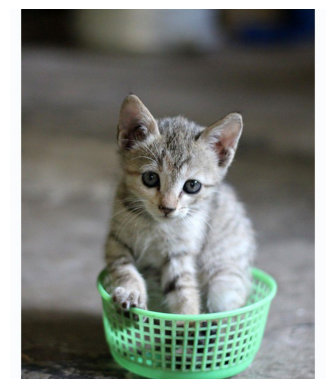

In [35]:
from PIL import Image # pip install Pillow

# Load an image
img = Image.open('/content/DeepLearningAndGenerativeModelsCourse/res/cat.jpg')
plt.imshow(img)
plt.axis('off')

print(img.size)

In [36]:
transform = transforms.Compose([transforms.CenterCrop((512,512)),
                                transforms.Resize((256,256)),
                                transforms.ToTensor(),
                                transforms.Lambda(lambda x: x[:3])]) # remove the alpha channel if present
img_tensor = transform(img)
img_tensor = img_tensor.to(device)

torch.Size([3, 256, 256])

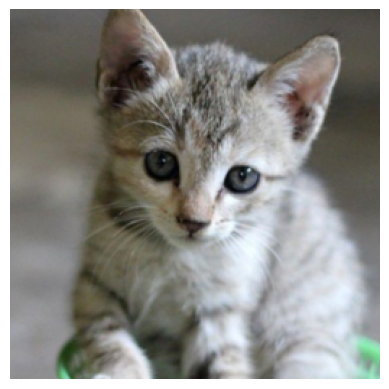

In [38]:
plt.imshow(img_tensor.permute(1,2,0))
plt.axis('off')
img_tensor.shape

In [39]:
# Use HOOKS
conv_output = []

#append all the conv layers and their respective wights to the list
def append_conv(module, input, output):
    print("Output size {}".format(output.size()))
    conv_output.append(output.detach().cpu())

In [40]:
for k in layers_list:
    alexnet.features[k].register_forward_hook(append_conv)

In [52]:
conv_output = []
# pass the image through the net

out = alexnet(img_tensor.unsqueeze(0))

for c_out in conv_output:
    print(c_out.size())

Output size torch.Size([1, 64, 63, 63])
Output size torch.Size([1, 192, 31, 31])
Output size torch.Size([1, 384, 15, 15])
Output size torch.Size([1, 256, 15, 15])
Output size torch.Size([1, 256, 15, 15])
torch.Size([1, 64, 63, 63])
torch.Size([1, 192, 31, 31])
torch.Size([1, 384, 15, 15])
torch.Size([1, 256, 15, 15])
torch.Size([1, 256, 15, 15])


In [59]:
conv_output[0][0, :64, :, :].data.shape

torch.Size([64, 63, 63])

torch.Size([64, 63, 63])
torch.Size([64, 31, 31])
torch.Size([64, 15, 15])
torch.Size([64, 15, 15])
torch.Size([64, 15, 15])


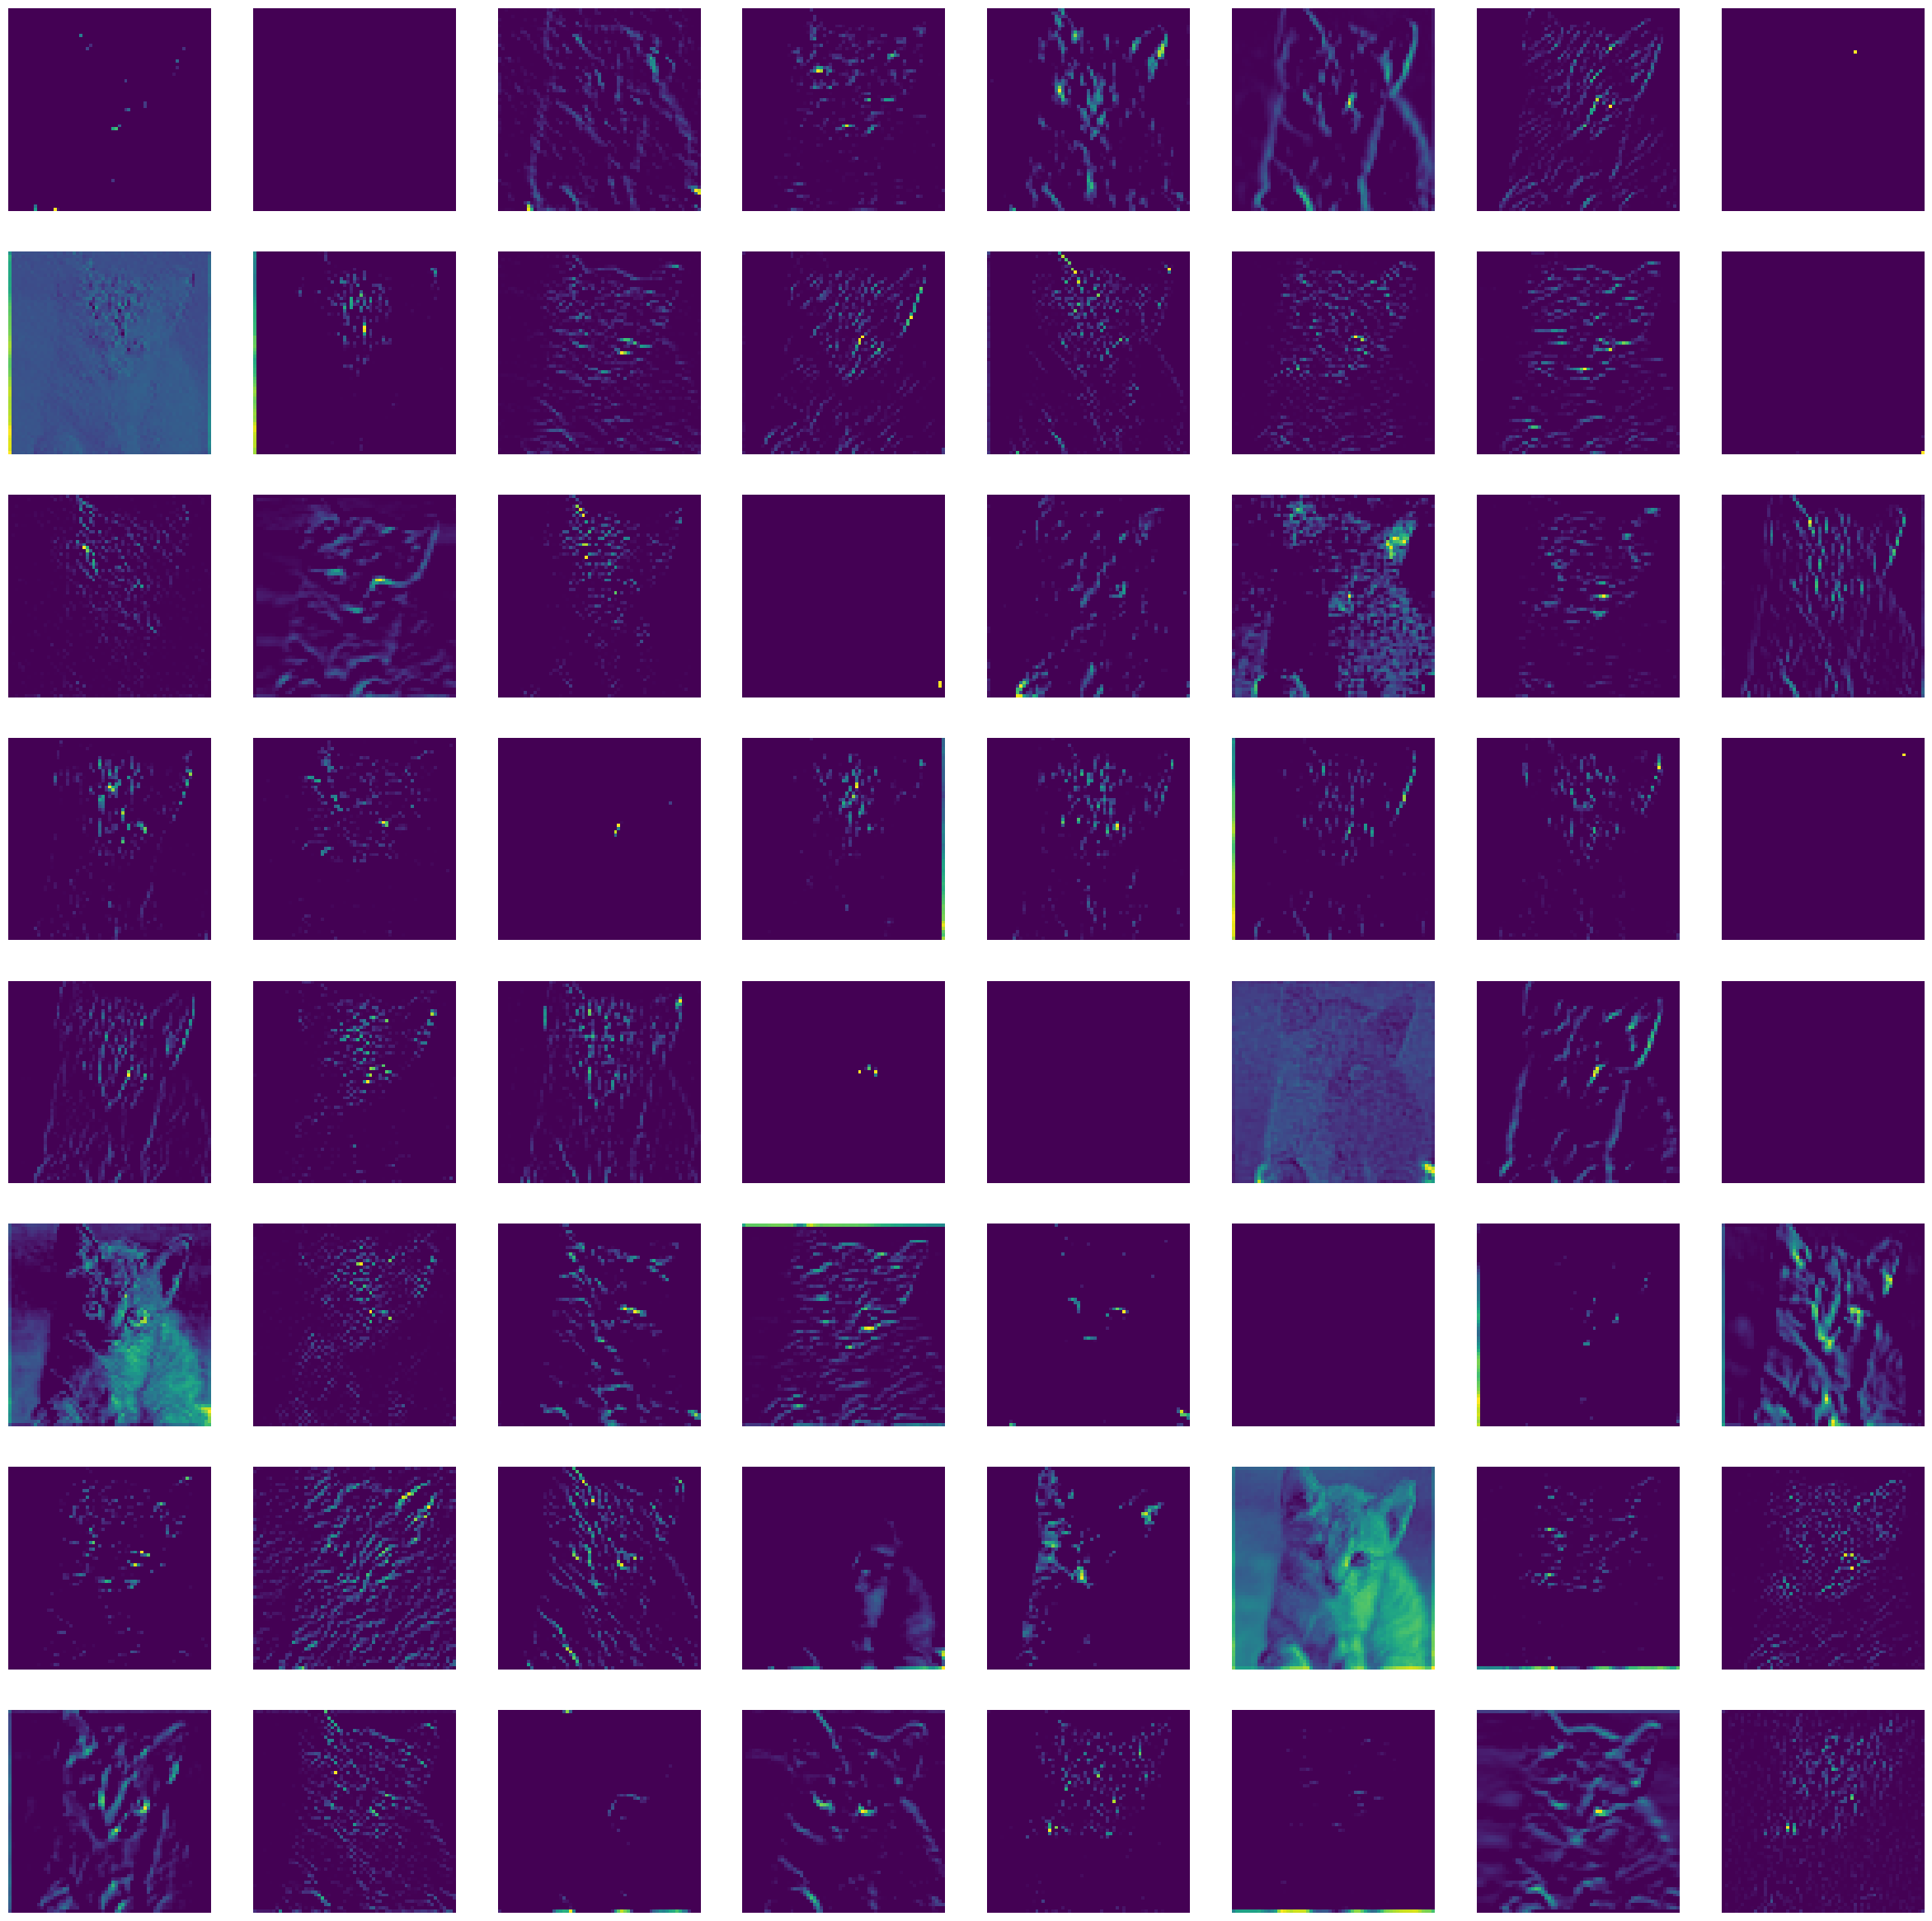

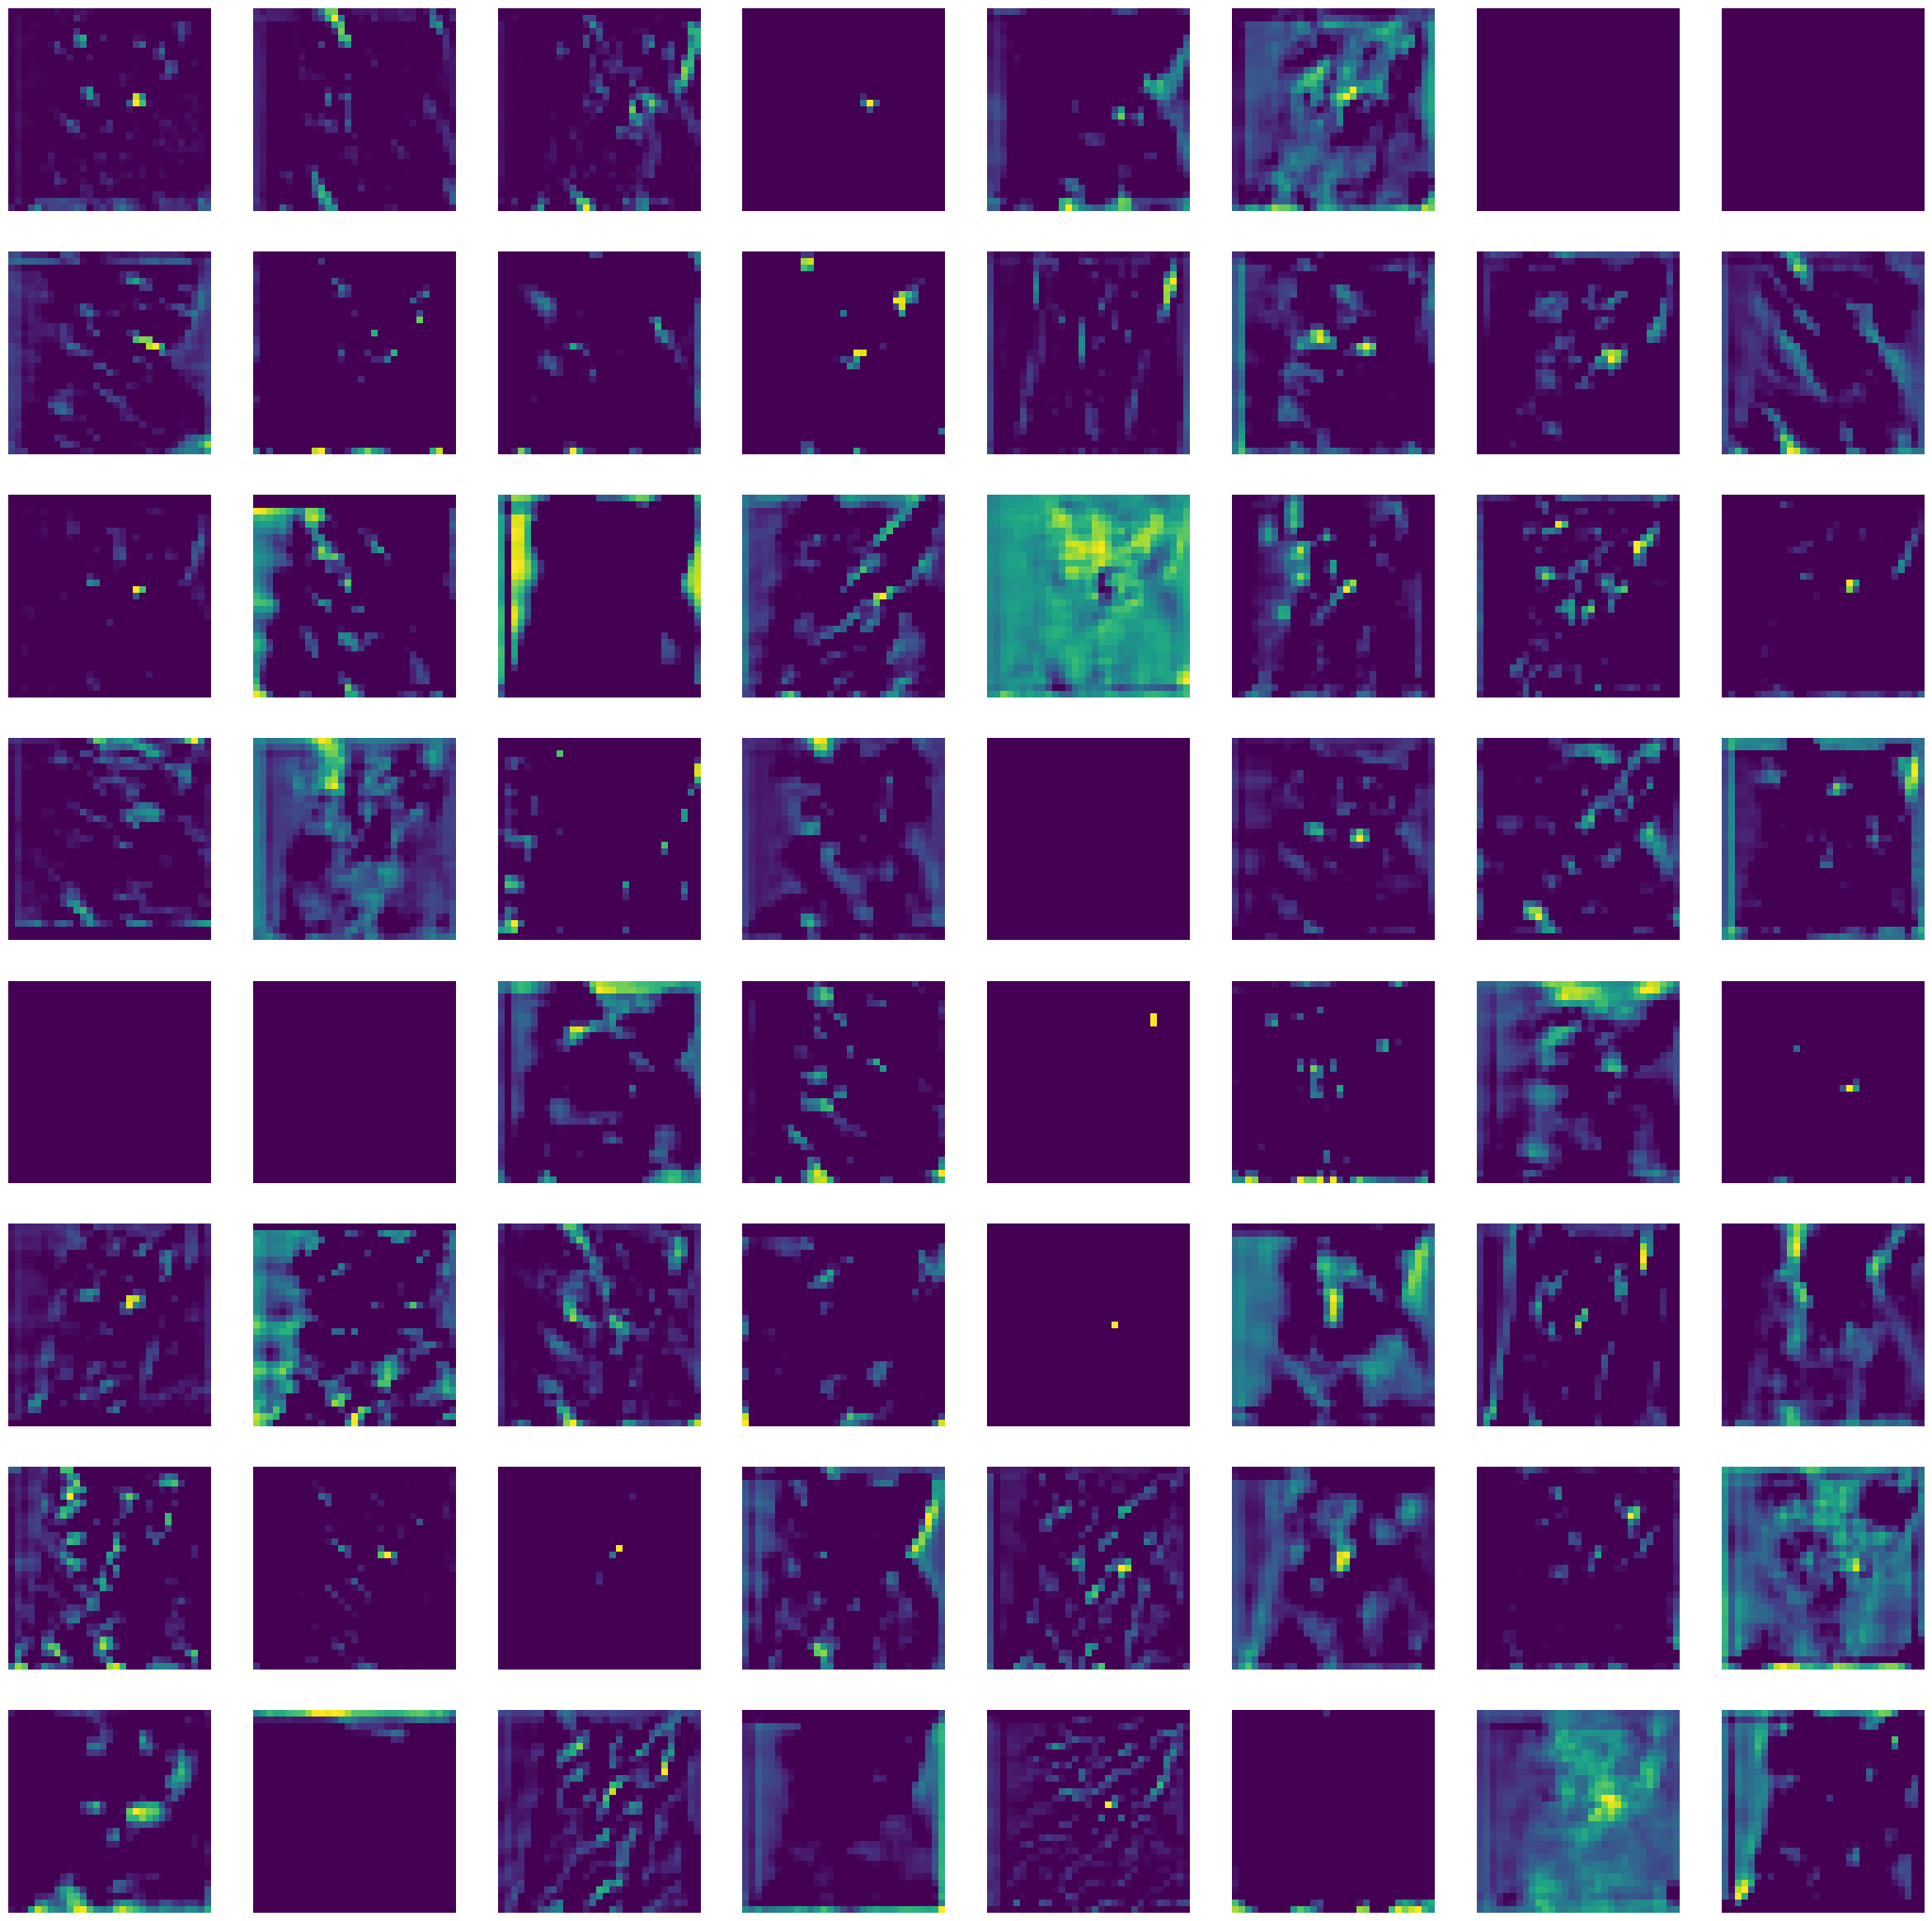

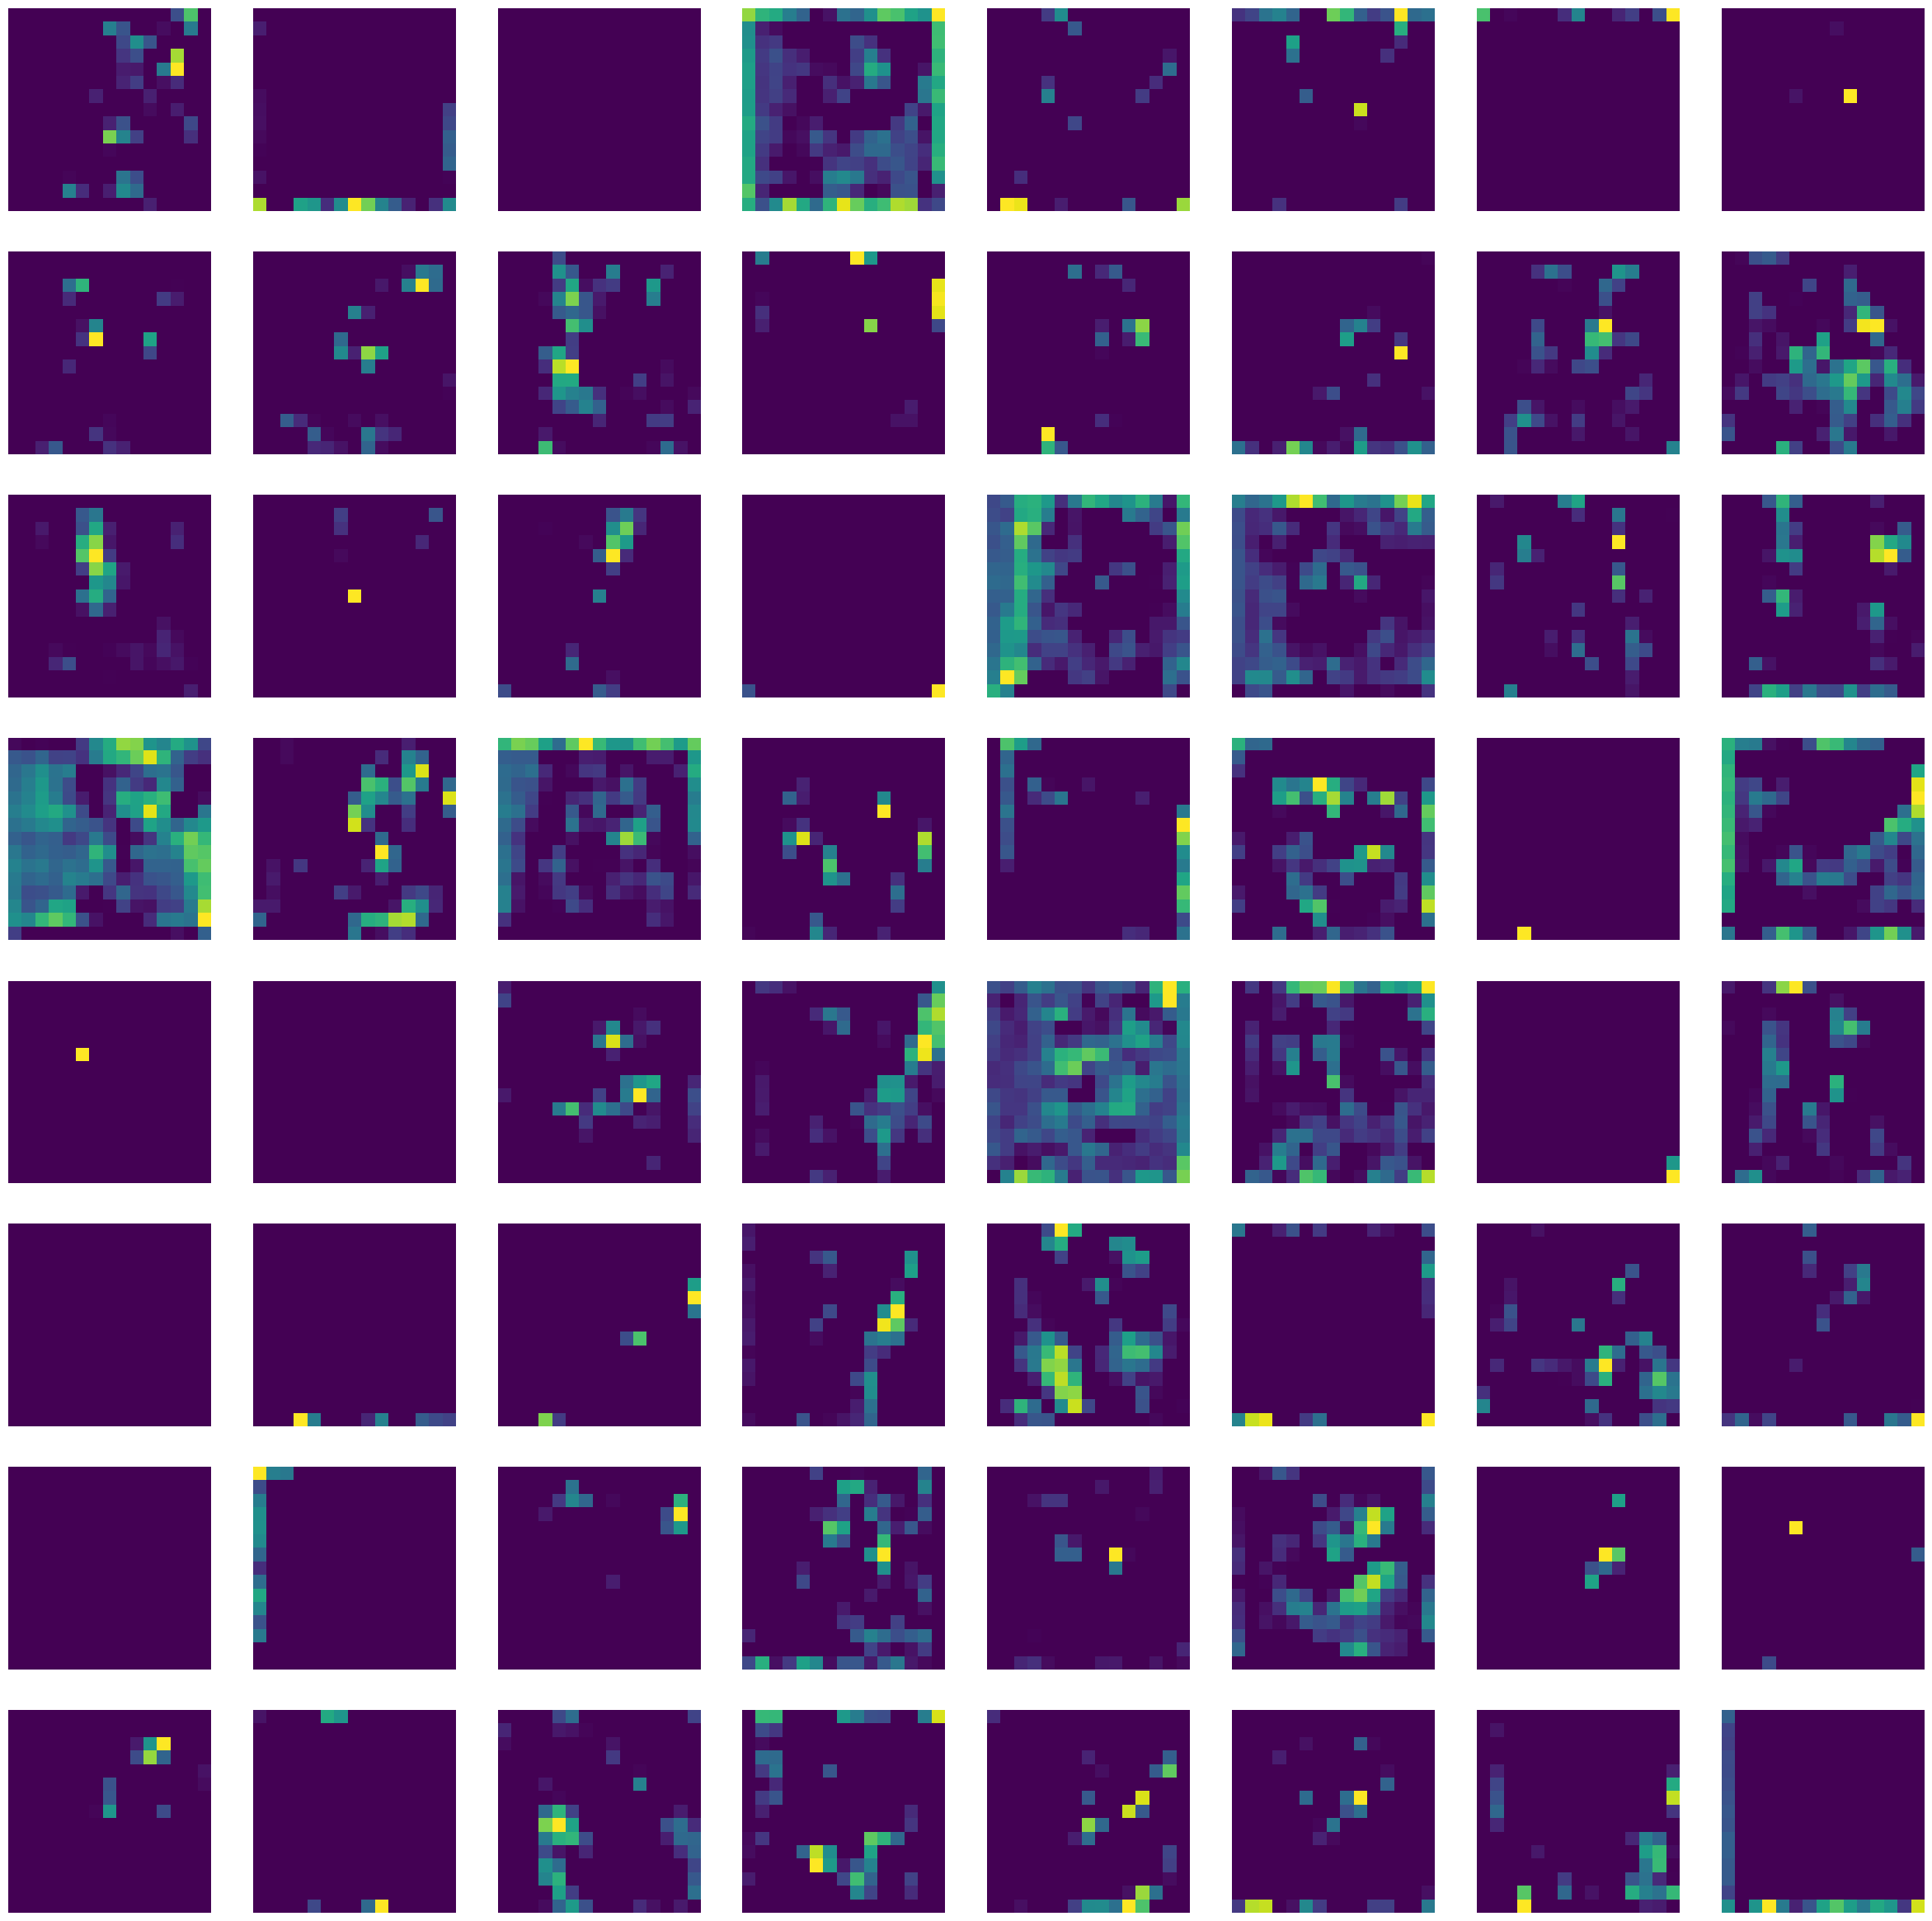

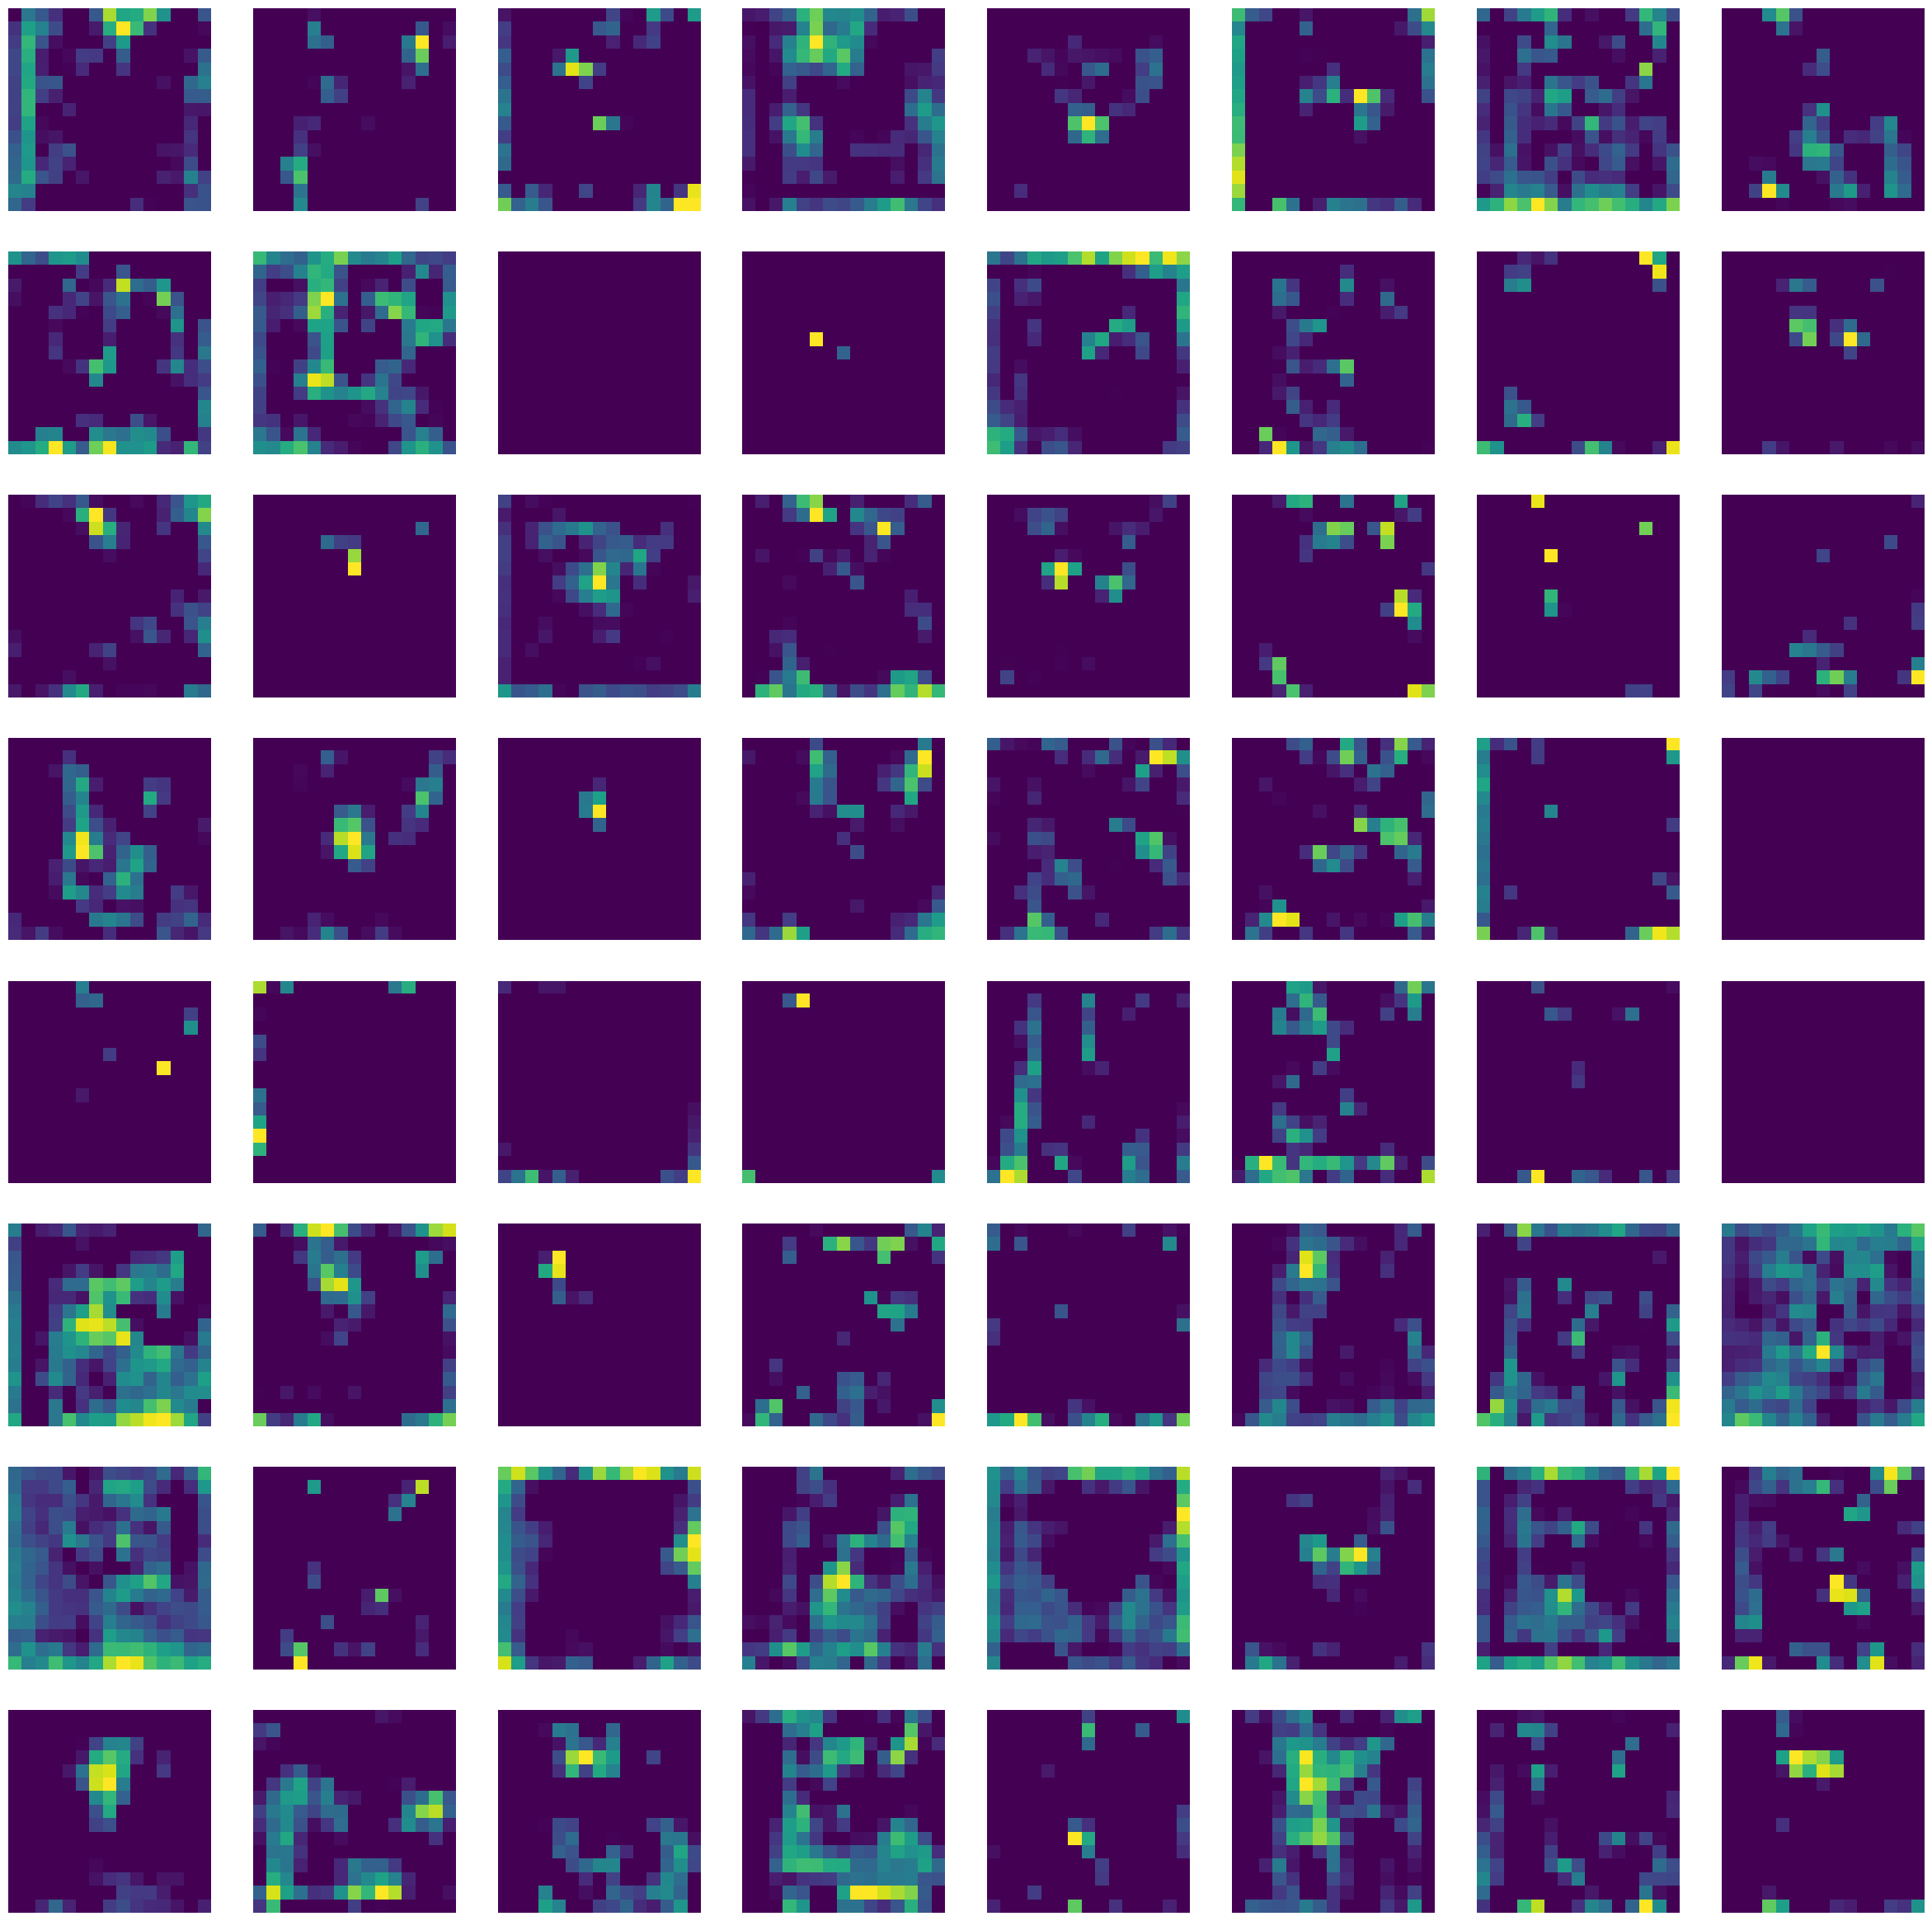

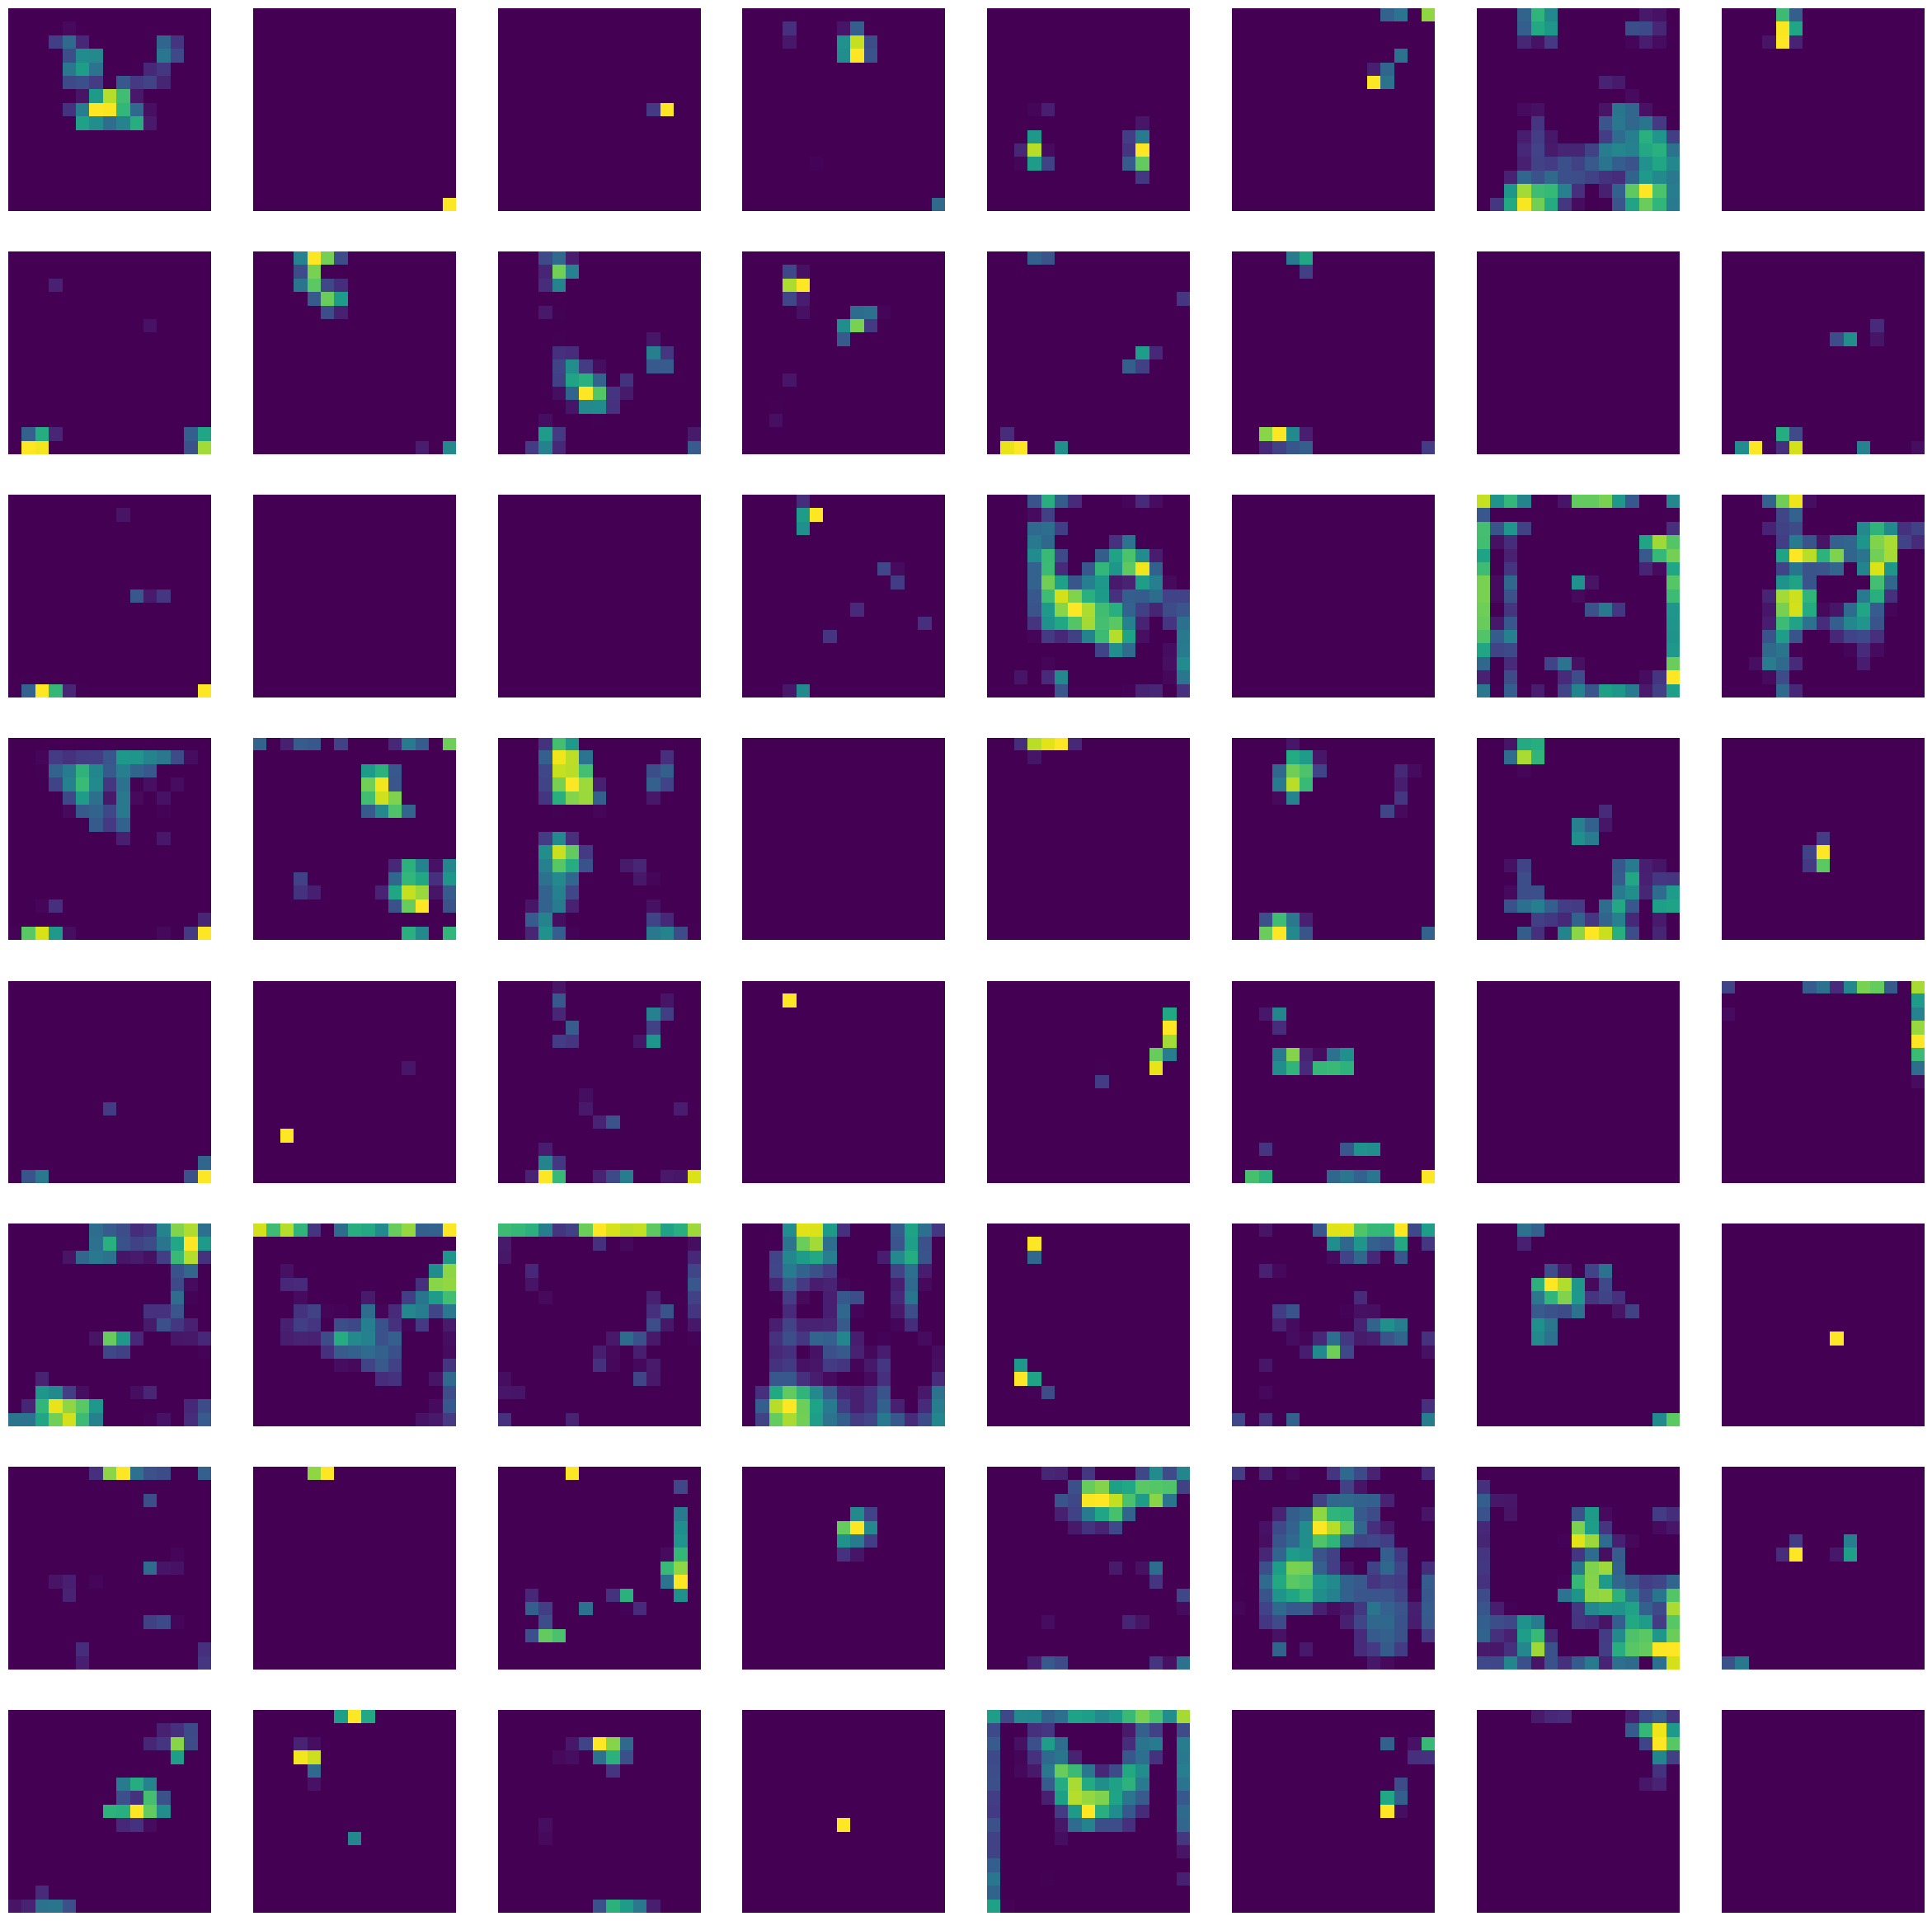

In [42]:
for num_layer in range(len(conv_output)):
    plt.figure(figsize=(30, 30))
    layer_viz = conv_output[num_layer][0, :64, :, :]
    layer_viz = layer_viz.data
    print(layer_viz.size())
    for i, filter in enumerate(layer_viz):
        plt.subplot(8, 8, i + 1)
        plt.imshow(filter)
        plt.axis("off")